In [ ]:
import pandas as pd
import cv2
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from keras.optimizers import adam_v2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#-------------------------------------------------------------
# FUNCTION TO NORMALIZE THE PIXEL VALUES OF AN IMAGE
#-------------------------------------------------------------
def normalizeFacesData(FER_DATA):
  faces = []
  for pixel_sequence in FER_DATA['pixels']:
    temp_list = [int(s)for s in pixel_sequence.split(" ")]
    temp_list = np.reshape(temp_list, (height, width, 1))
    temp_list = temp_list/255.0
    faces.append(temp_list.astype('float32'))
  faces = np.array([np.array(face) for face in faces])
  return faces

In [ ]:
#-------------------------------------------------------------
# HYPERPARAMETER DECLARATIONS
#-------------------------------------------------------------
classes = 7
width, height = 48,48
input_shape = (48,48,1)
batch_size = 128
epochs = 15
num_features = 64
#-------------------------------------------------------------

In [ ]:
#-------------------------------------------------------------
#KERAS MODEL 
#-------------------------------------------------------------
model = Sequential()

# input layer
model.add(Conv2D(num_features/2, kernel_size=(3, 3), activation='relu', input_shape=(width,height,1)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 1st hidden layer
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd hidden layer
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd hidden layer
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten layer
model.add(Flatten())
model.add(Dense(2*2*num_features, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# output layer
model.add(Dense(classes, activation='softmax'))

model.summary()
model.save_weights('/content/model.h5')
#-------------------------------------------------------------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 128)       7

In [ ]:
FER_DATA = pd.read_csv('/content/fer2013.csv')
FER_DATA = FER_DATA.drop(['Usage'], axis = 1)
column_titles = ['pixels', 'emotion']
FER_DATA = FER_DATA.reindex(columns = column_titles)
faces = normalizeFacesData(FER_DATA)
faces = np.asarray(faces)
emotions = FER_DATA['emotion'].to_numpy()
emotions = np.expand_dims(emotions, -1)

In [ ]:
#-------------------------------------------------------------
#TRAINING
#-------------------------------------------------------------
x_train, x_test, y_train, y_test = train_test_split(faces, emotions, test_size = 0.3, random_state = 1)

print('X_train shape: {}; X_train[0].shape: {}'.format(x_train.shape, x_train[0].shape))
print('X_test shape: {}'.format(x_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))
#-------------------------------------------------------------

X_train shape: (25120, 48, 48, 1); X_train[0].shape: (48, 48, 1)
X_test shape: (10767, 48, 48, 1)
y_train shape: (25120, 1)
y_test shape: (10767, 1)


Epoch 1/5
393/393 [==============================] - 37s 67ms/step - loss: 5.1662 - accuracy: 0.2363 - val_loss: 2.8125 - val_accuracy: 0.1811
Epoch 2/5
393/393 [==============================] - 26s 65ms/step - loss: 2.6034 - accuracy: 0.3756 - val_loss: 2.7092 - val_accuracy: 0.3268
Epoch 3/5
393/393 [==============================] - 25s 64ms/step - loss: 2.4703 - accuracy: 0.4513 - val_loss: 2.5818 - val_accuracy: 0.4369
Epoch 4/5
393/393 [==============================] - 25s 64ms/step - loss: 2.3936 - accuracy: 0.4840 - val_loss: 2.5615 - val_accuracy: 0.4034
Epoch 5/5
393/393 [==============================] - 25s 64ms/step - loss: 2.2838 - accuracy: 0.5019 - val_loss: 2.5460 - val_accuracy: 0.4708


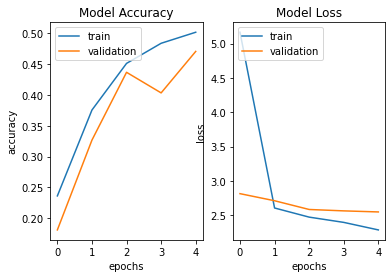

Epoch 1/10
393/393 [==============================] - 25s 65ms/step - loss: 4.5016 - accuracy: 0.2395 - val_loss: 2.5485 - val_accuracy: 0.2386
Epoch 2/10
393/393 [==============================] - 25s 64ms/step - loss: 2.2875 - accuracy: 0.3756 - val_loss: 2.5021 - val_accuracy: 0.3417
Epoch 3/10
393/393 [==============================] - 25s 64ms/step - loss: 2.3770 - accuracy: 0.4477 - val_loss: 2.4046 - val_accuracy: 0.4536
Epoch 4/10
393/393 [==============================] - 25s 65ms/step - loss: 2.3888 - accuracy: 0.4775 - val_loss: 2.4003 - val_accuracy: 0.4461
Epoch 5/10
393/393 [==============================] - 25s 64ms/step - loss: 2.2507 - accuracy: 0.4998 - val_loss: 2.3335 - val_accuracy: 0.4828
Epoch 6/10
393/393 [==============================] - 25s 64ms/step - loss: 2.2056 - accuracy: 0.5129 - val_loss: 2.1851 - val_accuracy: 0.5111
Epoch 7/10
393/393 [==============================] - 25s 64ms/step - loss: 2.1579 - accuracy: 0.5182 - val_loss: 2.0995 - val_accuracy:

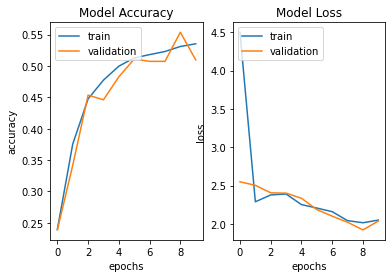

Epoch 1/20
393/393 [==============================] - 26s 66ms/step - loss: 4.4686 - accuracy: 0.2397 - val_loss: 2.8014 - val_accuracy: 0.2451
Epoch 2/20
393/393 [==============================] - 26s 65ms/step - loss: 2.3215 - accuracy: 0.3432 - val_loss: 2.6731 - val_accuracy: 0.3185
Epoch 3/20
393/393 [==============================] - 26s 65ms/step - loss: 2.4966 - accuracy: 0.4197 - val_loss: 2.6124 - val_accuracy: 0.3784
Epoch 4/20
393/393 [==============================] - 26s 65ms/step - loss: 2.3761 - accuracy: 0.4687 - val_loss: 2.3770 - val_accuracy: 0.4893
Epoch 5/20
393/393 [==============================] - 26s 65ms/step - loss: 2.2902 - accuracy: 0.4908 - val_loss: 2.2747 - val_accuracy: 0.4754
Epoch 6/20
393/393 [==============================] - 26s 65ms/step - loss: 2.2021 - accuracy: 0.5009 - val_loss: 2.1041 - val_accuracy: 0.5111
Epoch 7/20
393/393 [==============================] - 26s 65ms/step - loss: 2.1291 - accuracy: 0.5119 - val_loss: 2.1970 - val_accuracy:

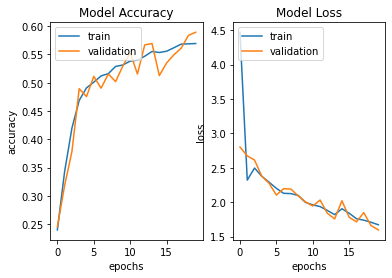

Epoch 1/30
393/393 [==============================] - 26s 65ms/step - loss: 4.8405 - accuracy: 0.2260 - val_loss: 2.3719 - val_accuracy: 0.2349
Epoch 2/30
393/393 [==============================] - 26s 65ms/step - loss: 2.3475 - accuracy: 0.2967 - val_loss: 2.3480 - val_accuracy: 0.3073
Epoch 3/30
393/393 [==============================] - 26s 65ms/step - loss: 2.3561 - accuracy: 0.3721 - val_loss: 3.0993 - val_accuracy: 0.2786
Epoch 4/30
393/393 [==============================] - 26s 65ms/step - loss: 2.4050 - accuracy: 0.4385 - val_loss: 2.8061 - val_accuracy: 0.2869
Epoch 5/30
393/393 [==============================] - 26s 66ms/step - loss: 2.3399 - accuracy: 0.4709 - val_loss: 2.3796 - val_accuracy: 0.4364
Epoch 6/30
393/393 [==============================] - 26s 66ms/step - loss: 2.2438 - accuracy: 0.4937 - val_loss: 2.4594 - val_accuracy: 0.4466
Epoch 7/30
393/393 [==============================] - 26s 66ms/step - loss: 2.2036 - accuracy: 0.4983 - val_loss: 2.1976 - val_accuracy:

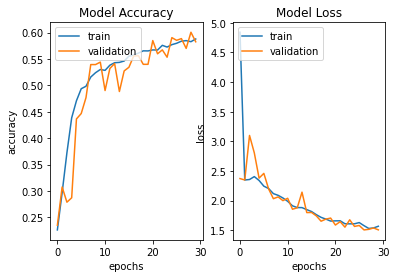

Epoch 1/40
393/393 [==============================] - 26s 65ms/step - loss: 4.8441 - accuracy: 0.2353 - val_loss: 2.5468 - val_accuracy: 0.2572
Epoch 2/40
393/393 [==============================] - 26s 65ms/step - loss: 2.3789 - accuracy: 0.3285 - val_loss: 4.1127 - val_accuracy: 0.1769
Epoch 3/40
393/393 [==============================] - 25s 65ms/step - loss: 2.3524 - accuracy: 0.3984 - val_loss: 2.9409 - val_accuracy: 0.2061
Epoch 4/40
393/393 [==============================] - 25s 65ms/step - loss: 2.3774 - accuracy: 0.4589 - val_loss: 2.5863 - val_accuracy: 0.3914
Epoch 5/40
393/393 [==============================] - 25s 65ms/step - loss: 2.3064 - accuracy: 0.4811 - val_loss: 2.5793 - val_accuracy: 0.3886
Epoch 6/40
393/393 [==============================] - 26s 65ms/step - loss: 2.2432 - accuracy: 0.4933 - val_loss: 2.3579 - val_accuracy: 0.4345
Epoch 7/40
393/393 [==============================] - 26s 65ms/step - loss: 2.1567 - accuracy: 0.5091 - val_loss: 2.2716 - val_accuracy:

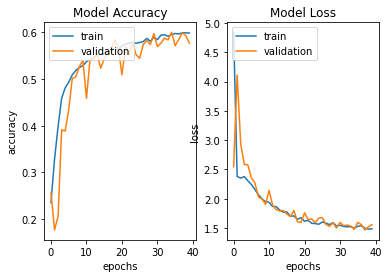

Epoch 1/50
393/393 [==============================] - 26s 66ms/step - loss: 4.7186 - accuracy: 0.2274 - val_loss: 2.5640 - val_accuracy: 0.2094
Epoch 2/50
393/393 [==============================] - 26s 65ms/step - loss: 2.3653 - accuracy: 0.3311 - val_loss: 2.6377 - val_accuracy: 0.2985
Epoch 3/50
393/393 [==============================] - 26s 66ms/step - loss: 2.4537 - accuracy: 0.4153 - val_loss: 3.3344 - val_accuracy: 0.1374
Epoch 4/50
393/393 [==============================] - 26s 65ms/step - loss: 2.3664 - accuracy: 0.4645 - val_loss: 2.3509 - val_accuracy: 0.4536
Epoch 5/50
393/393 [==============================] - 26s 65ms/step - loss: 2.3333 - accuracy: 0.4811 - val_loss: 2.3779 - val_accuracy: 0.4410
Epoch 6/50
393/393 [==============================] - 26s 65ms/step - loss: 2.2830 - accuracy: 0.4982 - val_loss: 2.2181 - val_accuracy: 0.4749
Epoch 7/50
393/393 [==============================] - 26s 66ms/step - loss: 2.1809 - accuracy: 0.5130 - val_loss: 2.2033 - val_accuracy:

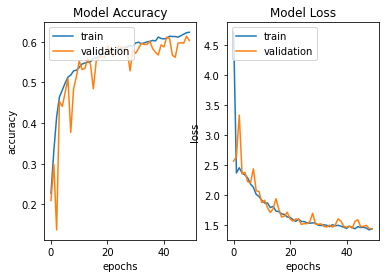

Epoch 1/100
393/393 [==============================] - 26s 66ms/step - loss: 5.1281 - accuracy: 0.2465 - val_loss: 2.8554 - val_accuracy: 0.2591
Epoch 2/100
393/393 [==============================] - 26s 66ms/step - loss: 2.4593 - accuracy: 0.3456 - val_loss: 2.4751 - val_accuracy: 0.3352
Epoch 3/100
393/393 [==============================] - 26s 67ms/step - loss: 2.5023 - accuracy: 0.4086 - val_loss: 2.5737 - val_accuracy: 0.3422
Epoch 4/100
393/393 [==============================] - 26s 66ms/step - loss: 2.4320 - accuracy: 0.4506 - val_loss: 2.6376 - val_accuracy: 0.3914
Epoch 5/100
393/393 [==============================] - 26s 66ms/step - loss: 2.3908 - accuracy: 0.4801 - val_loss: 2.1276 - val_accuracy: 0.5107
Epoch 6/100
393/393 [==============================] - 26s 66ms/step - loss: 2.2487 - accuracy: 0.4951 - val_loss: 2.2889 - val_accuracy: 0.4531
Epoch 7/100
393/393 [==============================] - 26s 66ms/step - loss: 2.1769 - accuracy: 0.5113 - val_loss: 2.2786 - val_ac

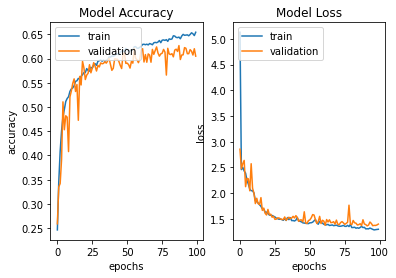

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam_v2.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])
epochs = [5, 10, 20, 30, 40, 50, 100]
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.2, random_state = 1)
for epoch in epochs:
    model.load_weights('/content/model.h5')
    history = model.fit(x_train, y_train, epochs=epoch, verbose=1, validation_data=(x_val, y_val), batch_size = 64)

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['train', 'validation'], loc='upper left')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [ ]:
model.save_weights('/content/model_trained.h5')

In [ ]:
train_loss, train_acc = model.evaluate(x_train, y_train, batch_size=1)
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1)
print('Final train accuracy: {:.2f}\tFinal test accuracy: {:.2f}'.format(train_acc*100, test_acc*100))

8613/8613 [==============================] - 61s 7ms/step - loss: 1.4321 - accuracy: 0.6049
Final train accuracy: 70.55	Final test accuracy: 60.49


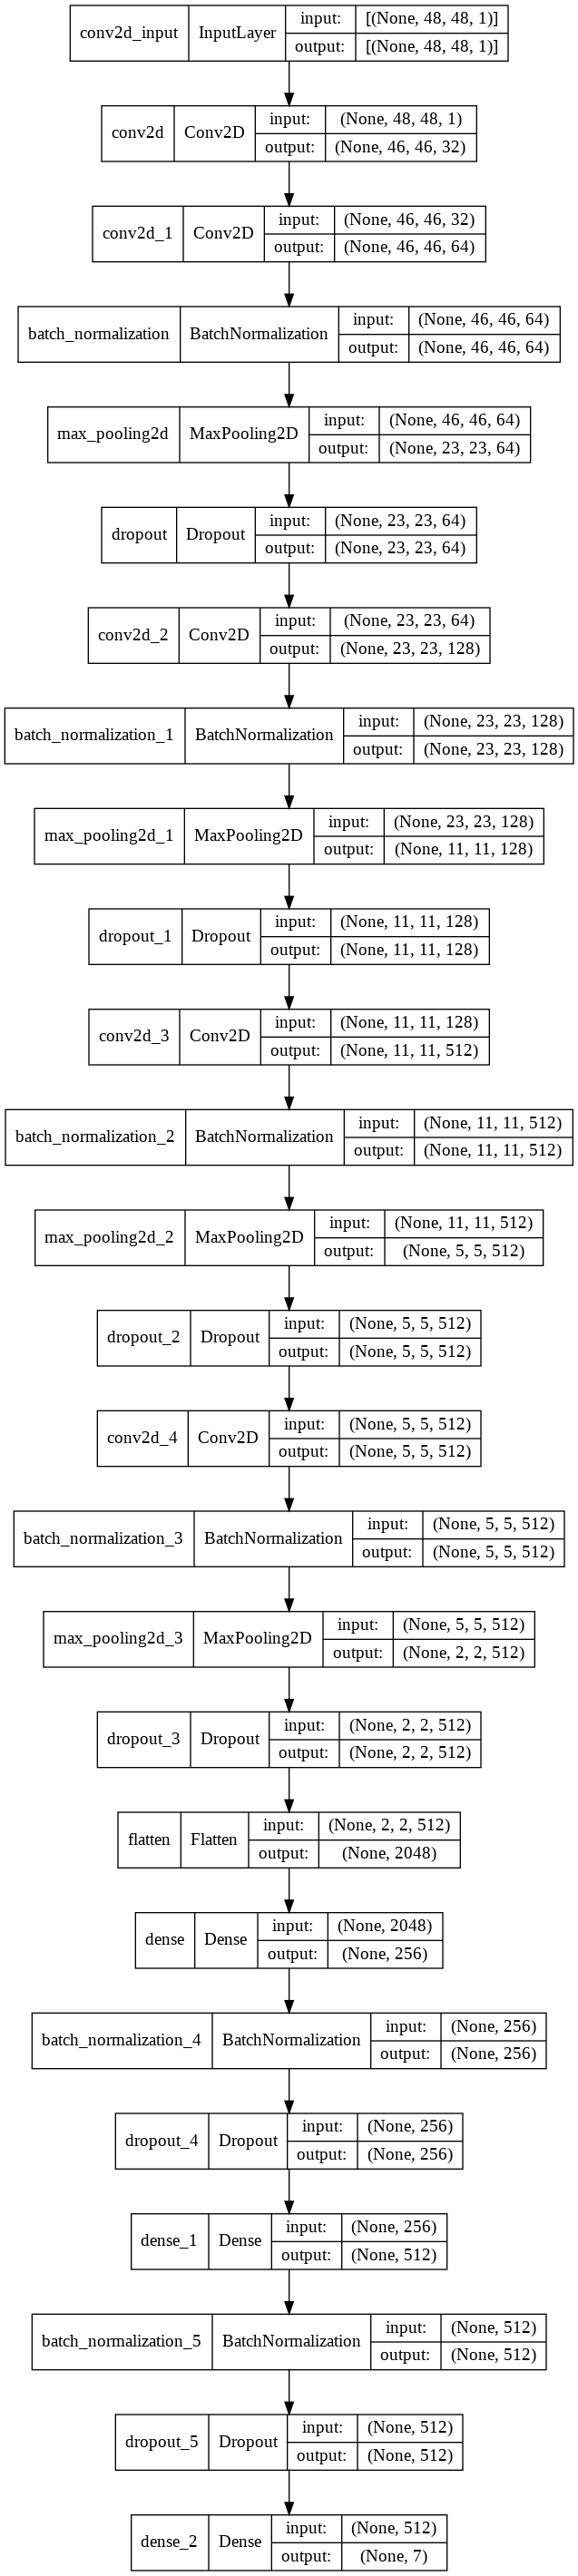

In [12]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)